In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\LEGION\Downloads\XRP-Historical-Data.csv', on_bad_lines='skip', low_memory=False)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,0.3159,0.3141,0.3238,0.3120,444.26,0.56%
1,2019-03-02,0.3141,0.3159,0.3182,0.3105,286.01,-0.56%
2,2019-03-03,0.3111,0.3141,0.3154,0.3089,273.79,-0.97%
3,2019-03-04,0.3025,0.3111,0.3121,0.2979,328.22,-2.76%
4,2019-03-05,0.3151,0.3025,0.3179,0.3013,391.02,4.19%
...,...,...,...,...,...,...,...
1914,2024-05-28,0.5286,0.5339,0.5353,0.5218,451.13,-0.99%
1915,2024-05-29,0.5237,0.5286,0.5329,0.5201,501.98,-0.93%
1916,2024-05-30,0.5186,0.5237,0.5282,0.5132,533.93,-0.97%
1917,2024-05-31,0.5175,0.5186,0.5247,0.5129,487.46,-0.21%


In [4]:
# Chuyển đổi cột 'Date' thành định dạng datetime và sắp xếp dữ liệu theo ngày
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [5]:
# Chuẩn hóa dữ liệu giá
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df['Price']).reshape(-1, 1))

In [6]:
# Chia dữ liệu theo tỷ lệ 8:2
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

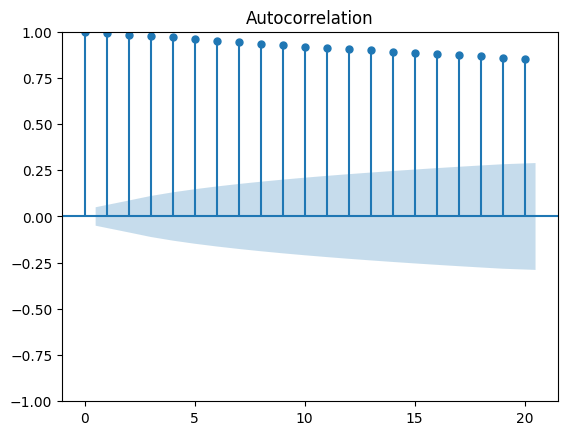

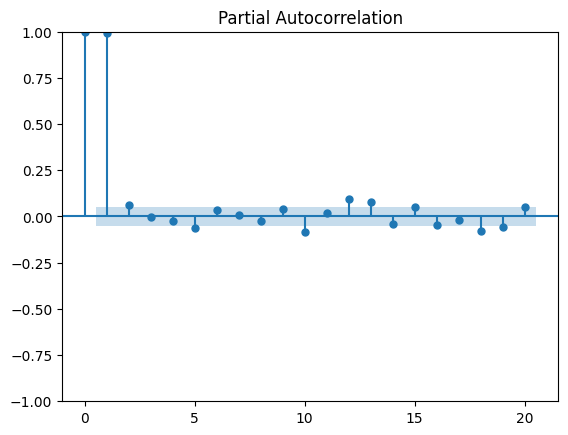

In [7]:
# Vẽ đồ thị ACF và PACF để xác định các giá trị p và q
plot_acf(train_data, lags=20)
plot_pacf(train_data, lags=20)
plt.show()

In [8]:
# Các giá trị khác nhau của p, d, q
p = range(0, 6)
d = range(0, 3)
q = range(0, 6)

# Tạo tất cả các kết hợp khác nhau của p, d, q
pdq = list(itertools.product(p, d, q))

# Tìm bộ thông số tốt nhất dựa trên AIC
best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        temp_model = ARIMA(train_data, order=param)
        temp_model_fit = temp_model.fit()
        if temp_model_fit.aic < best_aic:
            best_aic = temp_model_fit.aic
            best_pdq = param
    except:
        continue

print(f"Best ARIMA parameters: {best_pdq}")

Best ARIMA parameters: (5, 0, 3)


In [9]:
# Huấn luyện mô hình ARIMA với thông số tốt nhất
model = ARIMA(train_data, order=best_pdq)
model_fit = model.fit()

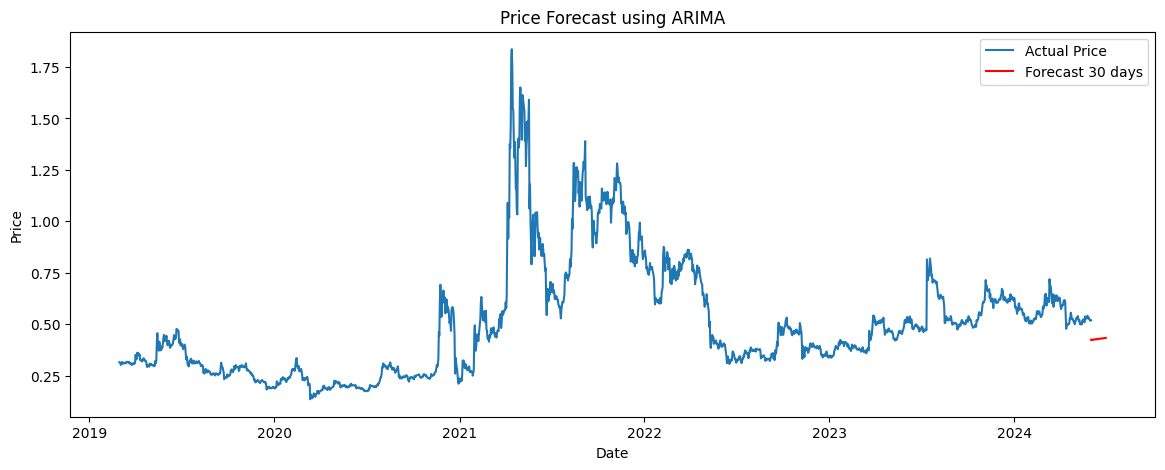

In [10]:
# Dự đoán giá trị trong 30 ngày tiếp theo
forecast_scaled = model_fit.forecast(steps=30)

# Chuyển đổi giá trị dự đoán về thang đo ban đầu
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

# Tạo các dãy ngày cho dự đoán
forecast_dates = pd.date_range(start=df['Date'].iloc[-1], periods=30)

# Vẽ biểu đồ dự đoán và giá thực tế
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Price'], label='Actual Price')
plt.plot(forecast_dates, forecast, label='Forecast 30 days', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Forecast using ARIMA')
plt.legend()
plt.show()

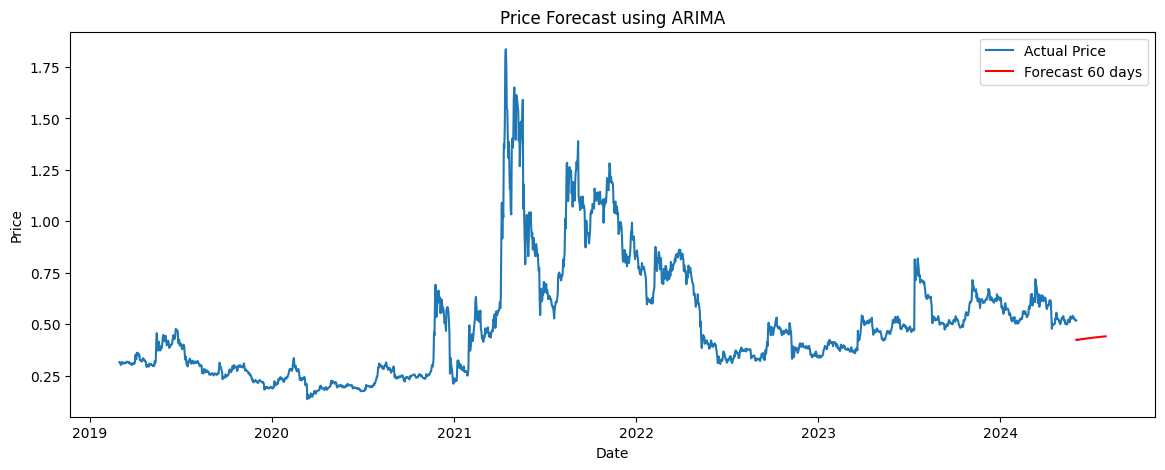

In [11]:
# Dự đoán giá trị trong 60 ngày`` tiếp theo
forecast_scaled = model_fit.forecast(steps=60)

# Chuyển đổi giá trị dự đoán về thang đo ban đầu
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

# Tạo các dãy ngày cho dự đoán
forecast_dates = pd.date_range(start=df['Date'].iloc[-1], periods=60)

# Vẽ biểu đồ dự đoán và giá thực tế
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Price'], label='Actual Price')
plt.plot(forecast_dates, forecast, label='Forecast 60 days', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Forecast using ARIMA')
plt.legend()
plt.show()

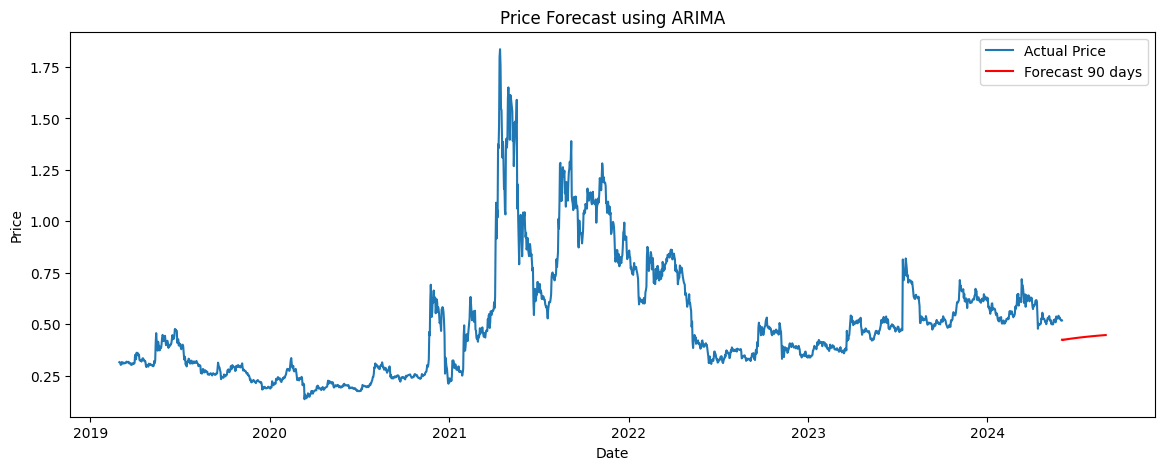

In [12]:
# Dự đoán giá trị trong 90 ngày tiếp theo
forecast_scaled = model_fit.forecast(steps=90)

# Chuyển đổi giá trị dự đoán về thang đo ban đầu
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

# Tạo các dãy ngày cho dự đoán
forecast_dates = pd.date_range(start=df['Date'].iloc[-1], periods=90)

# Vẽ biểu đồ dự đoán và giá thực tế
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Price'], label='Actual Price')
plt.plot(forecast_dates, forecast, label='Forecast 90 days', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Forecast using ARIMA')
plt.legend()
plt.show()